# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [41]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [42]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    
    response = requests.get(city_url)

    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Convert max temperature from Kelvin to Celsius
        city_max_temp_c = round(city_max_temp - 273.15, 2)

        # Convert the date format to a readable date string
        city_date_converted = time.strftime('%Y-%m-%d', time.localtime(city_date))


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp_c,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date_converted})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | bagotville
Processing Record 3 of Set 1 | kaitangata
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | lar gerd
City not found. Skipping...
Processing Record 7 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 8 of Set 1 | salinas
Processing Record 9 of Set 1 | solginskiy
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | alice springs
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | pevek
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | geraldton
Processing Record 17 of Set 1 | dikson
Processing Record 18 of Set 1 | nemuro
Processing Record 19 of Set 1 | batemans bay
Processing Record 20 of Set 1 | laguna
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 

In [43]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [44]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,arraial do cabo,-22.9661,-42.0278,23.53,82,15,1.30,BR,2023-04-06
1,bagotville,-28.9833,153.4167,19.80,77,33,2.16,AU,2023-04-06
2,kaitangata,-46.2817,169.8464,8.85,78,44,3.63,NZ,2023-04-06
3,east london,-33.0153,27.9116,25.52,61,0,5.14,ZA,2023-04-06
4,bluff,-46.6000,168.3333,9.86,53,75,5.63,NZ,2023-04-06


In [45]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [46]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arraial do cabo,-22.9661,-42.0278,23.53,82,15,1.30,BR,2023-04-06
1,bagotville,-28.9833,153.4167,19.80,77,33,2.16,AU,2023-04-06
2,kaitangata,-46.2817,169.8464,8.85,78,44,3.63,NZ,2023-04-06
3,east london,-33.0153,27.9116,25.52,61,0,5.14,ZA,2023-04-06
4,bluff,-46.6000,168.3333,9.86,53,75,5.63,NZ,2023-04-06


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

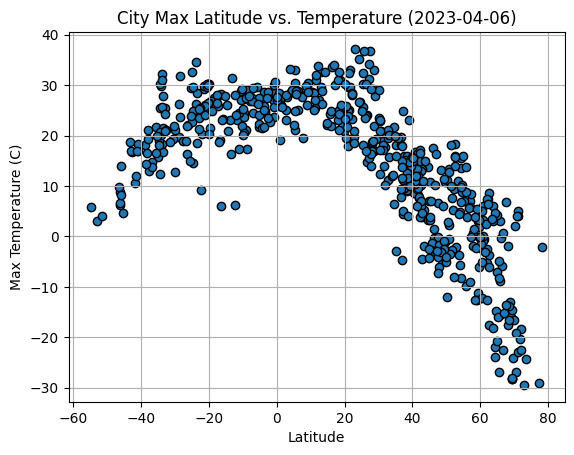

In [47]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({city_date_converted})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

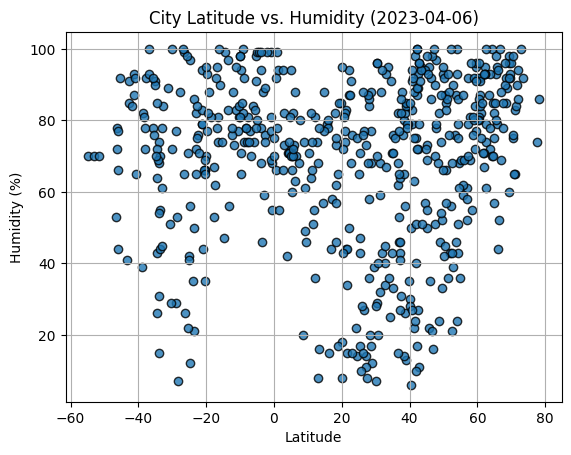

In [48]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({city_date_converted})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

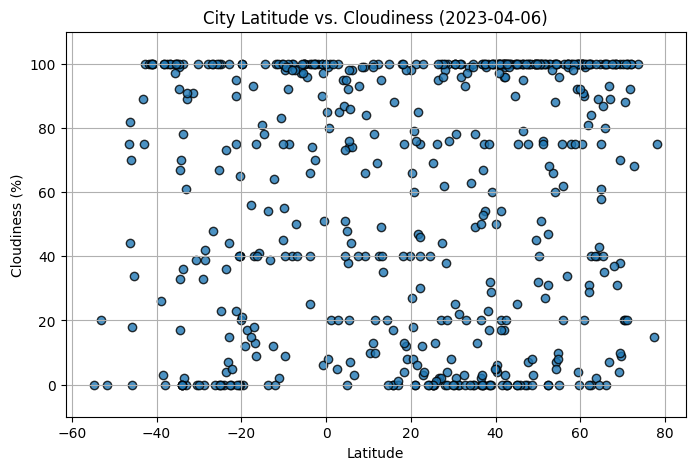

In [49]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8, 5))
for city in city_data:
    plt.scatter(city["Lat"], city["Cloudiness"], facecolors="C0", 
                edgecolors="black", linewidths=1, marker="o", 
                alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({city_date_converted})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.ylim(-10, 110)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

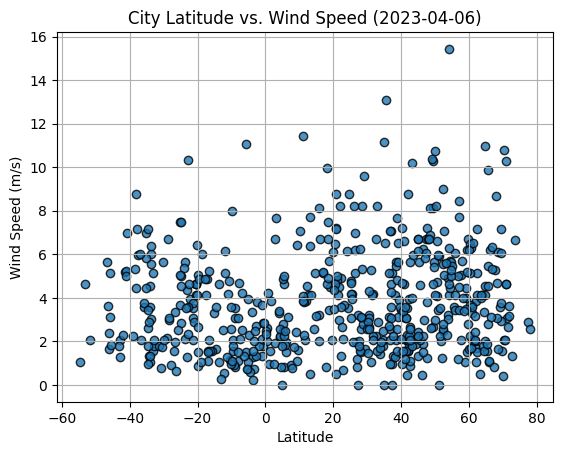

In [50]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({city_date_converted})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [51]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates):
    # Calculate the linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Calculate the y-values for the regression line
    regress_values = x_values * slope + intercept
    
    # Create the scatter plot with the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, color='red')
    
    # Add the labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.text(min(x_values), max(y_values), f"y = {round(slope, 2)}x + {round(intercept, 2)}", fontsize=12, color='red')
    
    # Show the plot and print r-value
    plt.show()
    print(f"The r-value is {r_value}")


In [52]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# Filter cities with latitude >= 0 to create a DataFrame for Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,salinas,36.6777,-121.6555,7.82,82,0,2.57,US,2023-04-06
6,solginskiy,61.0500,41.3428,-0.48,82,99,3.30,RU,2023-04-06
11,pevek,69.7008,170.3133,-24.19,92,9,1.58,RU,2023-04-06
12,albany,42.6001,-73.9662,10.17,93,100,0.89,US,2023-04-06
14,dikson,73.5069,80.5464,-24.31,92,100,6.64,RU,2023-04-06


In [53]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arraial do cabo,-22.9661,-42.0278,23.53,82,15,1.30,BR,2023-04-06
1,bagotville,-28.9833,153.4167,19.80,77,33,2.16,AU,2023-04-06
2,kaitangata,-46.2817,169.8464,8.85,78,44,3.63,NZ,2023-04-06
3,east london,-33.0153,27.9116,25.52,61,0,5.14,ZA,2023-04-06
4,bluff,-46.6000,168.3333,9.86,53,75,5.63,NZ,2023-04-06


###  Temperature vs. Latitude Linear Regression Plot

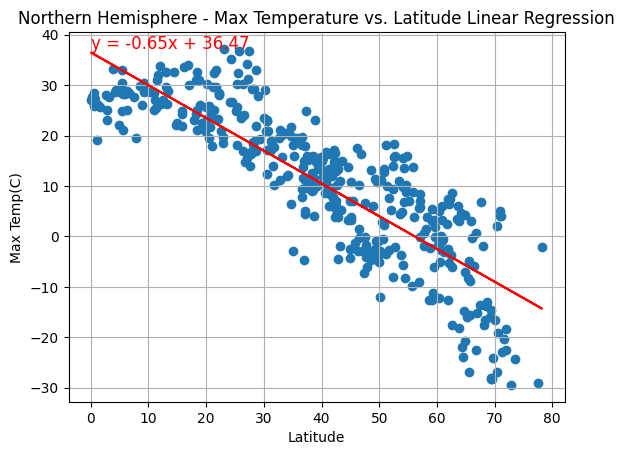

The r-value is -0.856441522741444


In [54]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temp(C)"
title = "Northern Hemisphere - Max Temperature vs. Latitude Linear Regression"
text_coordinates = (0, -30)

plt.grid(True)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

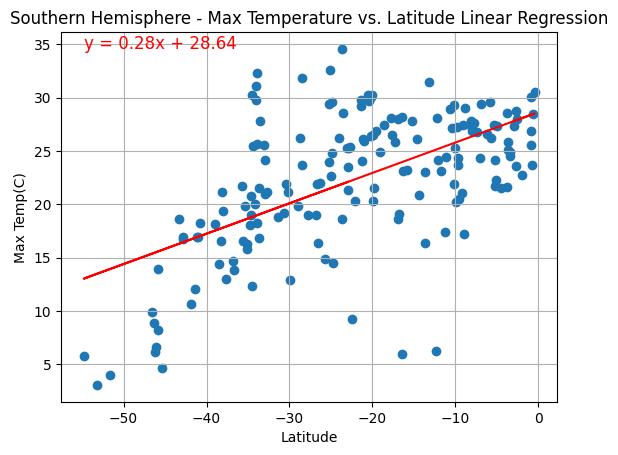

The r-value is 0.5833467512438006


In [55]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temp(C)"
title = "Southern Hemisphere - Max Temperature vs. Latitude Linear Regression"
text_coordinates = (0, -30)

plt.grid(True)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

The linear regression analysis between maximum temperature and latitude in the Northern Hemisphere shows a strong negative correlation with an r-value of -0.86, suggesting that there is a significant negative relationship between these two variables - as latitude increases, maximum temperature decreases.

The linear regression analysis between maximum temperature and latitude in the Southern Hemisphere indicates a moderate positive correlation with an r-value of 0.58, implying that there is a moderate positive relationship between these two variables - as latitude decreases, maximum temperature decreases.

### Humidity vs. Latitude Linear Regression Plot

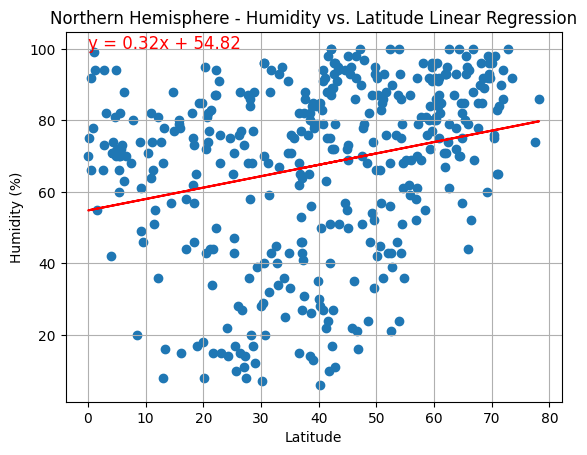

The r-value is 0.25396910804029427


In [56]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity (%)"
title = "Northern Hemisphere - Humidity vs. Latitude Linear Regression"
text_coordinates = (45, 15)

plt.grid(True)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

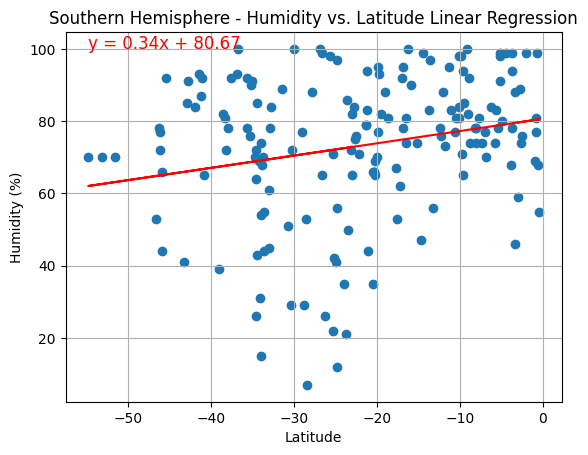

The r-value is 0.22639302040941817


In [57]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity (%)"
title = "Southern Hemisphere - Humidity vs. Latitude Linear Regression"
text_coordinates = (45, 15)

plt.grid(True)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

The linear regression analyses suggest that there is a weak positive correlation between humidity and latitude in both the Northern and Southern Hemispheres.

An r-value of 0.253 for the Northern Hemisphere indicates a weak positive correlation, implying that as one moves further away from the equator towards the North Pole, the humidity tends to increase slightly. Similarly, an r-value of 0.226 for the Southern Hemisphere indicates a weak positive correlation, suggesting that as one moves closer to the equator from the South Pole, the humidity tends to increase slightly.

### Cloudiness vs. Latitude Linear Regression Plot

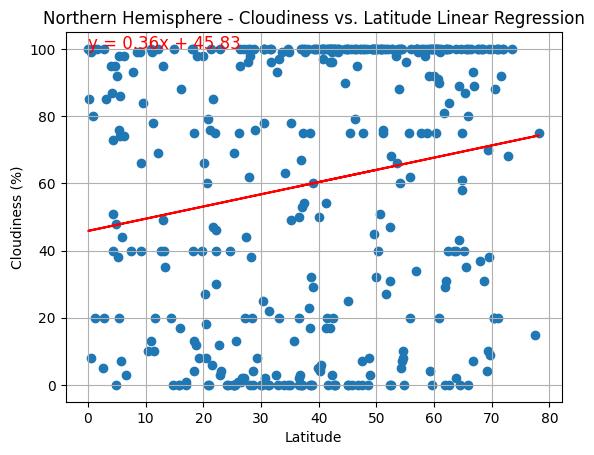

The r-value is 0.17629062205591806


In [58]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness (%)"
title = "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression"
text_coordinates = (45, 10)

plt.grid(True)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

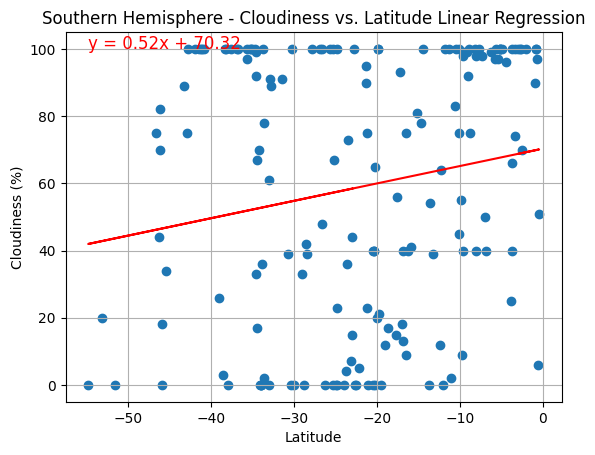

The r-value is 0.1765048518715446


In [59]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness (%)"
title = "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression"
text_coordinates = (45, 10)

plt.grid(True)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

The linear regression analyses suggest that there is a very weak positive correlation between cloudiness and latitude in both the Northern and Southern Hemispheres.

An r-value of 0.176 for the Northern Hemisphere indicates a very weak positive correlation, implying that as one moves further away from the equator towards the North Pole, the cloudiness tends to increase slightly. Similarly, an r-value of 0.177 for the Southern Hemisphere indicates a very weak positive correlation, suggesting that as one moves closer to the equator from the South Pole, the cloudiness tends to increase slightly.

### Wind Speed vs. Latitude Linear Regression Plot

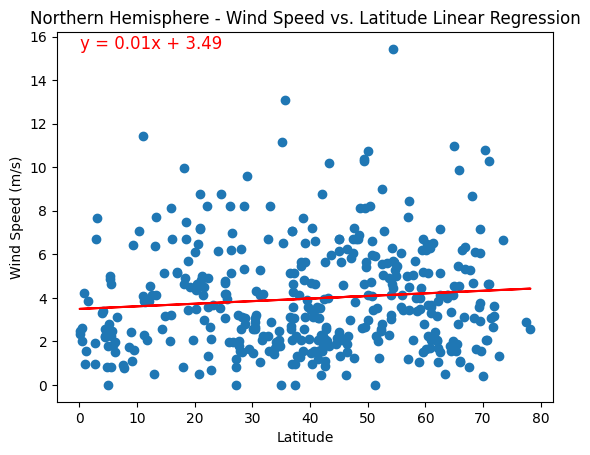

The r-value is 0.09537902366440942


In [60]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed (m/s)"
title = "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression"
text_coordinates = (0, 25)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

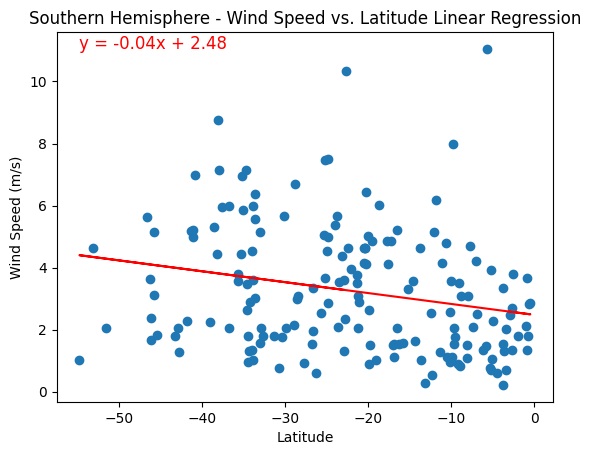

The r-value is -0.23191108171054875


In [61]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed (m/s)"
title = "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression"
text_coordinates = (0, 25)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

The linear regression analyses suggest that there is a very weak positive correlation between wind speed and latitude in the Northern Hemisphere, while there is a weak negative correlation between these variables in the Southern Hemisphere.

An r-value of 0.095 for the Northern Hemisphere indicates a very weak positive correlation, implying that as one moves further away from the equator towards the North Pole, the wind speed tends to increase slightly. On the other hand, an r-value of -0.232 for the Southern Hemisphere indicates a weak negative correlation, suggesting that as one moves closer to the equator from the South Pole, the wind speed tends to decrease slightly.